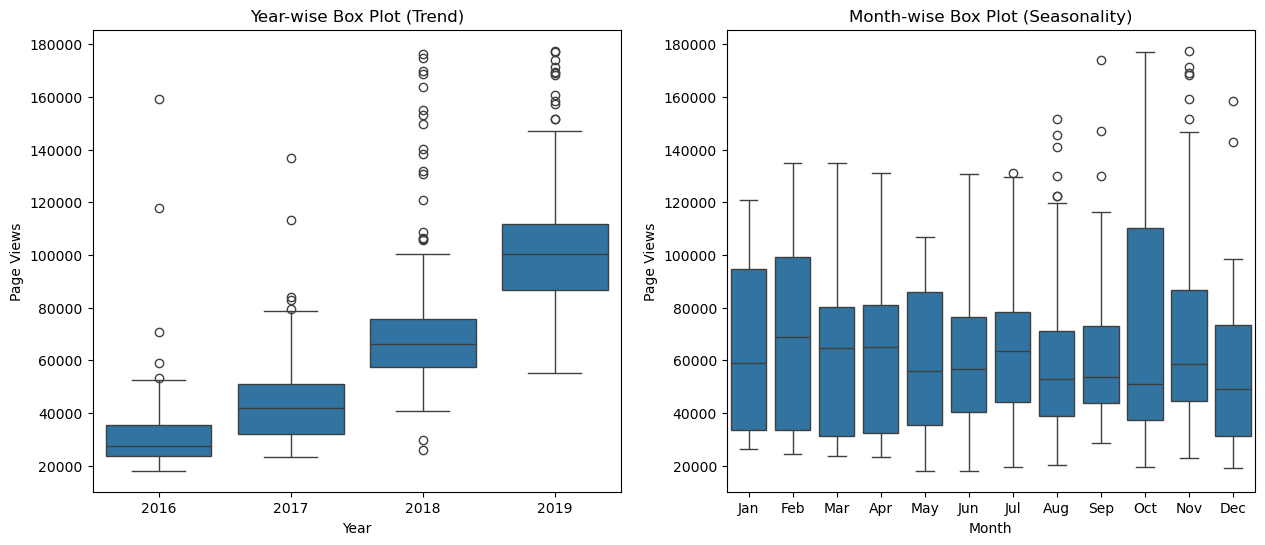

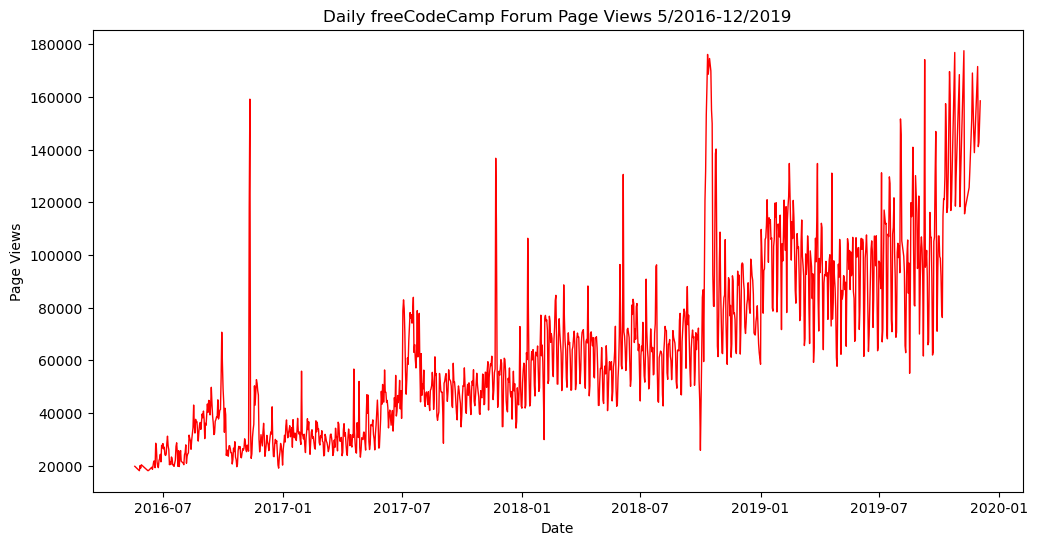

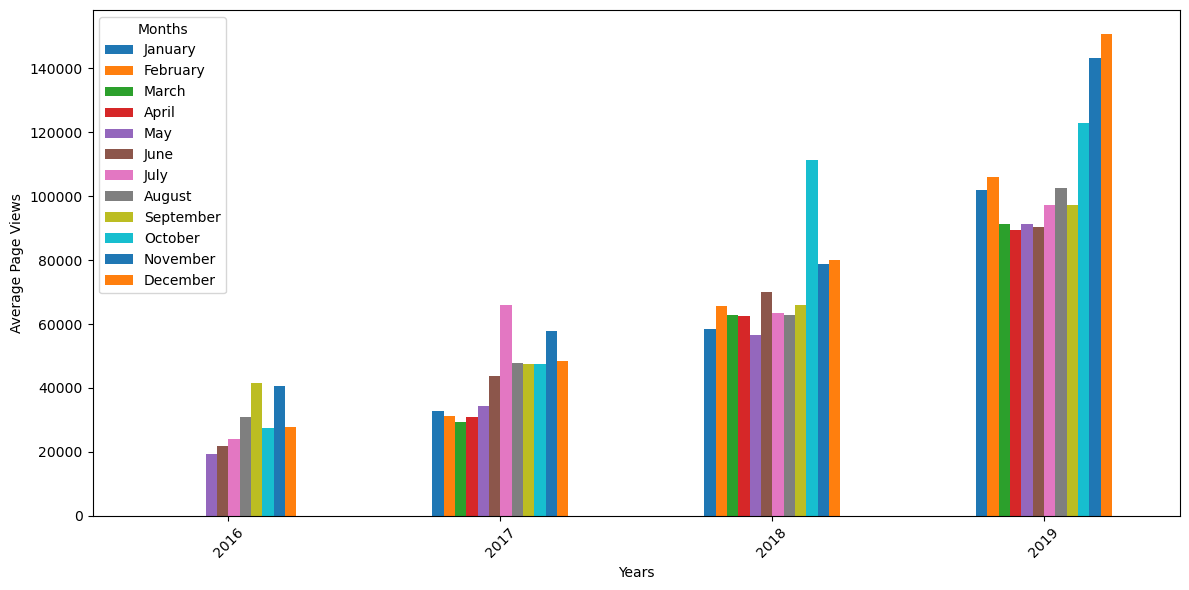

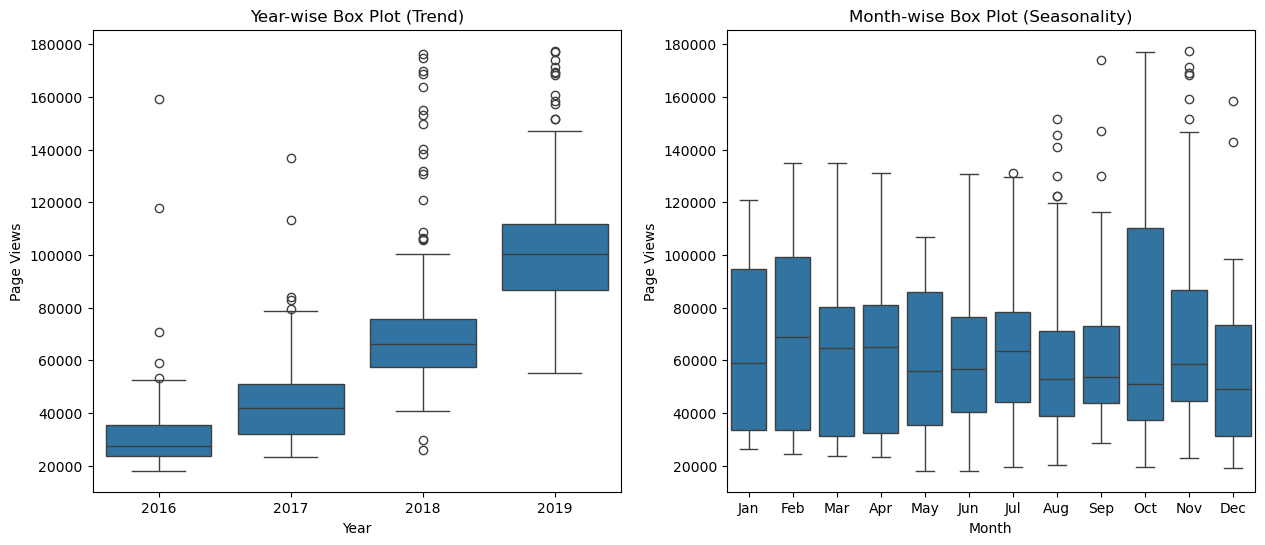

In [83]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Import data (Make sure to parse dates and set index column to 'date'.)
df = pd.read_csv('fcc-forum-pageviews.csv', parse_dates=['date'], index_col='date')

# Clean data
df = df[(df["value"] >= df["value"].quantile(0.025)) & (df["value"] <= df["value"].quantile(0.975))]

def draw_line_plot():
    # Draw line plot
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(df.index, df["value"], color="red", linewidth=1)
    
    # Add title and labels
    ax.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
    ax.set_xlabel("Date")
    ax.set_ylabel("Page Views")

    # Save image and return fig (don't change this part)
    fig.savefig('line_plot.png')
    return fig

def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_bar = df.copy()
    df_bar['year'] = df_bar.index.year
    df_bar['month'] = df_bar.index.month

    # Group data by year and month and calculate the mean
    df_bar = df_bar.groupby(['year', 'month'])['value'].mean().unstack()

    # Draw bar plot
    fig, ax = plt.subplots(figsize=(12, 6))
    df_bar.plot(kind='bar', ax=ax)
    ax.set_xlabel("Years")
    ax.set_ylabel("Average Page Views")
    ax.legend(title="Months", labels=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')
    return fig

def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = df_box['date'].dt.year
    df_box['month'] = df_box['date'].dt.strftime('%b')
    df_box['month_num'] = df_box['date'].dt.month
    df_box = df_box.sort_values('month_num')

    # Draw box plots using Seaborn
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
    
    # Year-wise Box Plot (Trend)
    sns.boxplot(x="year", y="value", data=df_box, ax=axes[0])
    axes[0].set_title("Year-wise Box Plot (Trend)")
    axes[0].set_xlabel("Year")
    axes[0].set_ylabel("Page Views")
    
    # Month-wise Box Plot (Seasonality)
    sns.boxplot(x="month", y="value", data=df_box, ax=axes[1])
    axes[1].set_title("Month-wise Box Plot (Seasonality)")
    axes[1].set_xlabel("Month")
    axes[1].set_ylabel("Page Views")

    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')
    return fig


draw_line_plot()
draw_bar_plot()
draw_box_plot()